In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from data_cleaning import df
from funciones import label
from sklearn.linear_model import LinearRegression

## Importación de datos

Cargando datos:

In [2]:
video_games = pd.DataFrame(df)

A continuación vamos a revisar la columna de años para poder hacer una revisión de los datos a través del tiempo

In [3]:
type(video_games['Year_of_Release'])

pandas.core.series.Series

In [4]:
video_games['Year_of_Release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.])

Se verifica que la variable 'Global Sales' es lo mismo que la suma de las ventas alrededor del mundo.

In [5]:
specific_sales = video_games['NA_Sales'] + video_games['EU_Sales'] + video_games['JP_Sales'] + video_games['Other_Sales']
Diference = video_games['Global_Sales'] - specific_sales
sum(Diference)

4.199999999999886

## Análisis Exploratorio

### Serie de tiempo de ventas

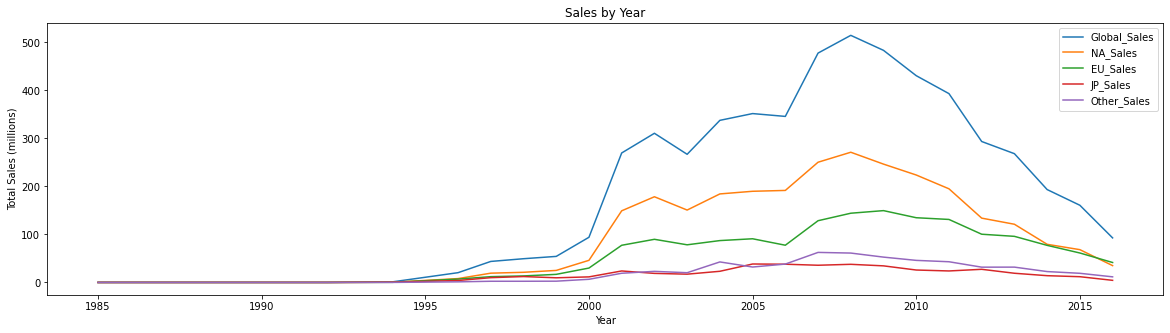

In [92]:
yearly_grouped = video_games.groupby(by="Year_of_Release")
all_sales_sum = (yearly_grouped[['Global_Sales','NA_Sales','EU_Sales','JP_Sales',
                                 'Other_Sales']]).sum()

all_sales_sum.plot(figsize=(20,5))
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.show()

### Serie de tiempo de lanzamientos

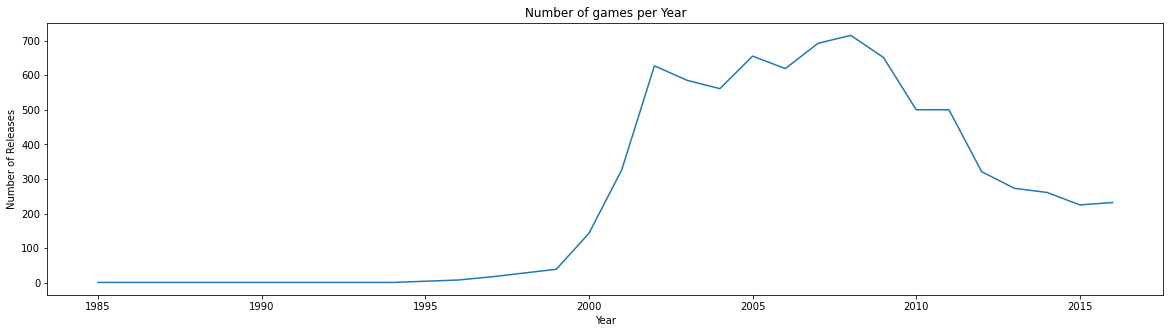

In [89]:
yearly_grouped = video_games.groupby(by="Year_of_Release")

games_x_year = yearly_grouped['Name'].count()

games_x_year.plot(figsize=(20,5))
plt.title('Number of games per Year')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

Vemos que los años donde hubo mayor venta de videojuegos fue después del año 2000 y previamente al 2015. Aunque esto se debe a los datos que tenemos, donde a partir de 2016, la base ya no contempla nuevos lanzamientos.

Cuando el año específico o el volumen de venta respecto al tiempo sea relevante, se considerarán los datos unicamente hasta 2016.

### Ventas por género del videojuego

Text(0, 0.5, 'Global Sales')

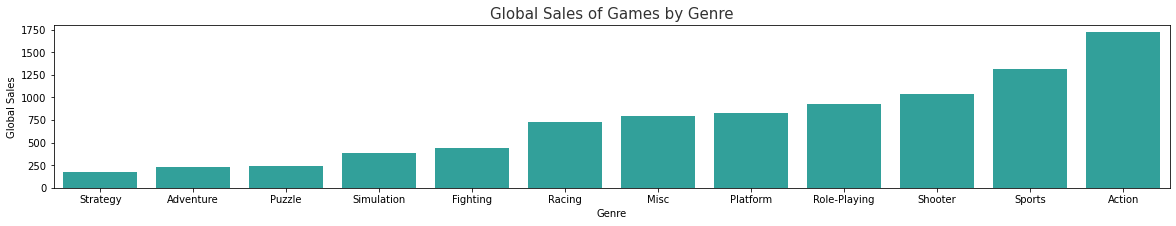

In [8]:
global_sales_by_genre = video_games.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize = (20,3))
ax = sns.barplot(x = global_sales_by_genre.index, y = global_sales_by_genre.Global_Sales, color = 'lightseagreen')
ax.set_title('Global Sales of Games by Genre', size=15, alpha=0.8)
ax.set_xlabel('Genre', size = 10)
ax.set_ylabel('Global Sales', size=10)

### Ventas por plataforma

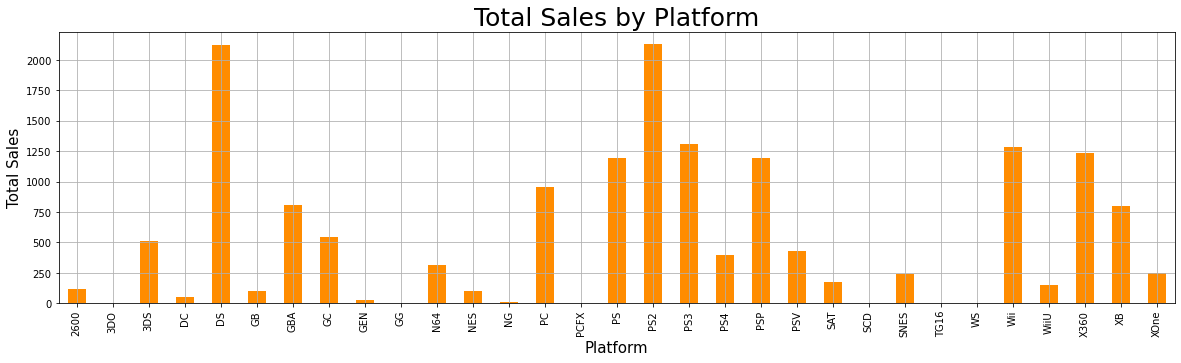

In [9]:
Platform_grouped = video_games.groupby(by = 'Platform')
total_sales = (Platform_grouped['Genre']).count().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkorange')
plt.title('Total Sales by Platform', size = 25)
plt.xlabel('Platform', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Se puede notar que las plataformas que más han vendido son PS2 y DS, seguidas por el PS3, Wii, X360 y PSP. Esto se debe a que estas son las consolas más populares en el periodo que se tienen más datos (2001 a 2015).

### Ventas por Publisher

Se utiliza la variable 'Publisher' a favor de 'Developer' ya que la primera está más agregada, es decir, un 'Publisher' está conformado de uno o más Developers. Para fines de este análisis, la información que nos provee 'Publisher' es suficiente

Text(0, 0.5, 'Sales')

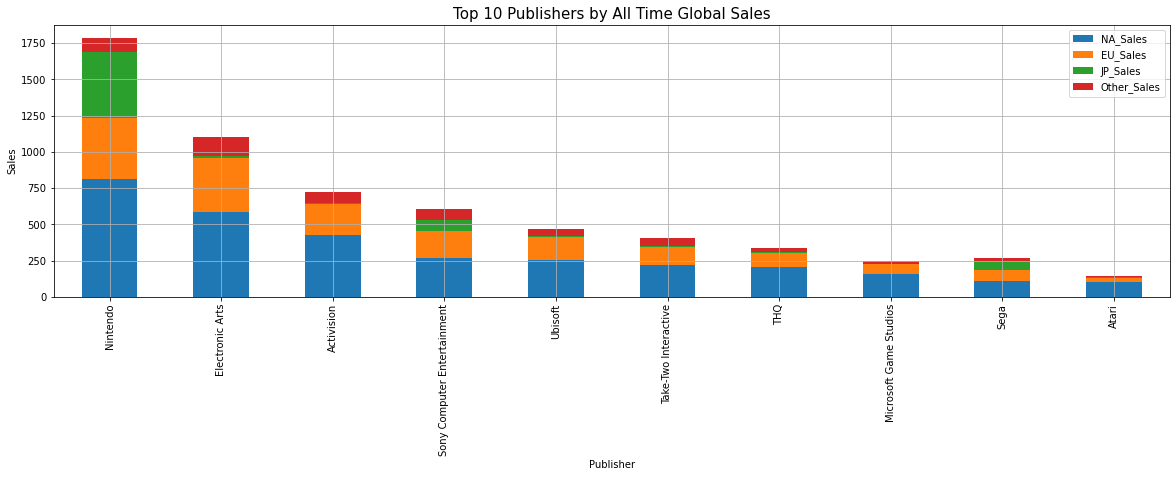

In [10]:
sales_publisher = video_games.pivot_table(index=['Publisher'], 
                                          values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                                          aggfunc=np.sum).sort_values(['NA_Sales'], ascending=False)
sales_publisher = sales_publisher[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ax = sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=True,figsize=(20,5))
ax.set_title('Top 10 Publishers by All Time Global Sales', size=15)
ax.set_xlabel('Publisher', size=10, color='black')
ax.set_ylabel('Sales', size=10, color='Black')

La gráfica anterior muestra el top 10 de empresas desarrolladoras segun sus ventas acumuladas a lo largo del tiempo. Se observa que en Japón existe una prevalencia de marcas nacionales, es decir, Sony, Sega y Nintendo.

### Ventas por fabricante de cada plataforma

Se relizará una agrupación de algunas plataformas, por las compañías que las fabrican.

In [93]:
platforms = {"Playstation": ["PS", "PS2", "PS3", "PS4"],
             "Xbox": ["XB", "X360", "XOne"],
             "PC": ["PC"],
             "Nintendo": ["SNES", "N64","NES", "GC","Wii", "WiiU"],
             "Portatil_Nin": ["GB", "GBA",  "DS", "3DS"],
             "Portatil_PS" : ["PSP", "PSV"],
             "Sega": ["DC", "GEN", "SAT", "SCD"]}

video_games["Grouped_Platform"] = video_games["Platform"].apply(lambda x: label(x, groups=platforms))
video_games["Grouped_Platform"].unique()

array(['Nintendo', 'Portatil_Nin', 'Xbox', 'Playstation', 'PC',
       'Portatil_PS', 'Sega'], dtype=object)

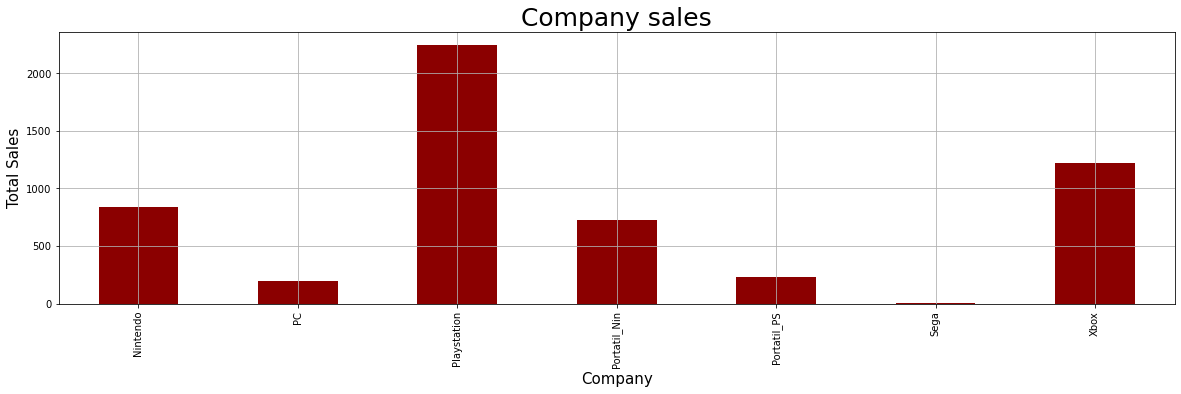

In [94]:
Platform_grouped = video_games[video_games['Year_of_Release'] < 2017].groupby(by = 'Grouped_Platform')
total_sales = (Platform_grouped['Global_Sales']).sum().plot(kind = 'bar', grid=True, figsize=(20,5), color = 'darkred')
plt.title('Company sales', size = 25)
plt.xlabel('Company', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

### Ventas por fabricante a lo largo del tiempo

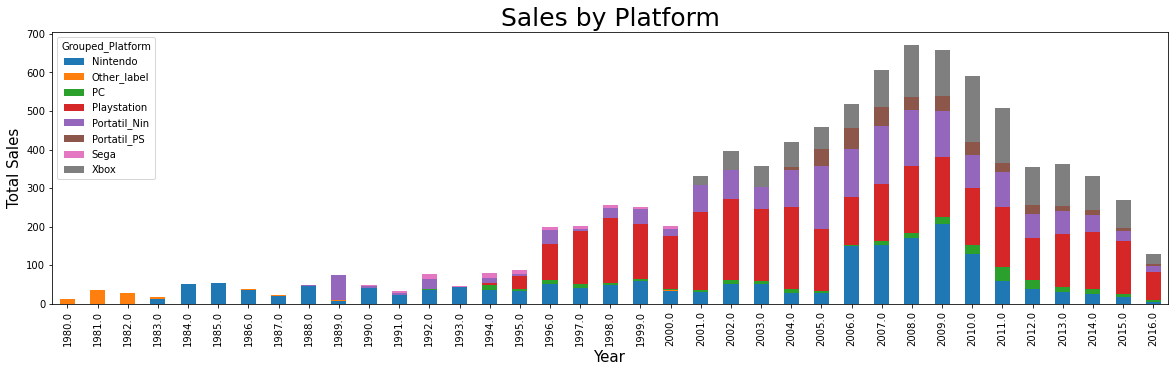

In [13]:

Platform_grouped = video_games[video_games['Year_of_Release'] < 2017].groupby(['Grouped_Platform','Year_of_Release'])
total_sales = (Platform_grouped['Global_Sales']).sum()

total_sales.unstack(level = -2).plot( kind = 'bar', stacked = True, grid=False, figsize=(20,5))
plt.title('Sales by Platform', size = 25)
plt.xlabel('Year', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Se pueden observar varios puntos interesantes:
- Playstation dominó las ventas poco después de su lanzamiento en 1994
- La industria de los videojuegos empezó a crecer rápidamente a partir de 2001, que coincide con la salida de XBox al mercado
- Nintendo es el fabricante más viejo que aún tiene relevancia hoy en día.
- Es importante notar que se separó Nintendo (Consola) de Nintento portátil (Gameboy y similares), y ambas tienen una fuerte participación en el mercado a lo largo del tiempo.

### Share de mercado a lo largo del tiempo

La sección anterior es muy útil para tener una perspectiva clara del comportamiento de la venta de videojuegos por consola a lo largo del tiempo. Sin embargo, también nos es útil ver la composición del mercado relativa, es decir, independientemente del nivel de ventas de ese año, qué porcentaje de los videojuegos vendidos pertenece a cada plataforma.

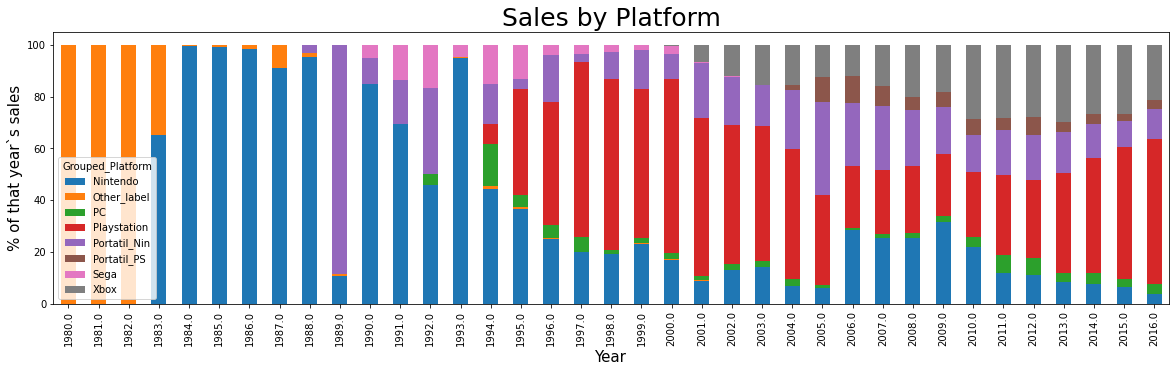

In [14]:
filled_data = total_sales.unstack(level = -2).fillna(0).apply(lambda x: x*100/sum(x), axis=1)

filled_data.plot( kind = 'bar', stacked = True, grid=False, figsize=(20,5))
plt.title('Sales by Platform', size = 25)
plt.xlabel('Year', size = 15)
plt.ylabel('% of that year`s sales',size = 15)
plt.show()

Algunos puntos relevantes:

- Nintendo dominó el mercado desde la salida del NES (Nintendo Entertainment System) en 1983, teniendo prácticamente un monopolio de los juegos publicados durante 3 años completos.
- El dominio de Nintendo sólo aumentó con la salida del GameBoy en 1989, es claro que en ese año todos los juegos vendidos eran de Gameboy o NES
- Sega hizo una lucha considerable, especialmente en el mercado japonés, con consolas como el Master System, Genesis y GameGear.
- Sega tuvo una participación de mercado decente durante algunos años, hasta que el nuevo milenio llegó y perdieron presencia completamente
- 1994 fue un año de transición y fuerte competencia, con una fuerte presencia de juegos de PC, y la salida del PlayStation de Sony. A partir de este año, comenzaría una dominio importante por parte de dicha consola, que terminaría con el dominio por parte de Nintendo
- 2001 puede considerarse el inicio de la "Era Moderna" de los videojuegos, donde el mercado se ve muy similar a como lo conocemos en años recientes, con Sony(PlayStation), Microsoft (XBox) y Nintendo (Consola y Portátil) se debaten año con año participación en el mercado.

Es importante tener en mente que los datos que se analizan son de los videojuegos para cada consola, y no la consola en sí, sin embargo, resulta un buen proxy para tener una buena idea de las ventas de las consolas en sí, pues a fin de cuentas, la decisión de comprar una consola se basa, predominantemente, en los títulos exclusivos que es posible jugar.

### Videojuegos según rating

A continuación observaremos los ratings y los scores

In [97]:
video_games[['Name']].groupby(video_games['Rating']).count()

,Name
Rating,
AO,1
E,2755
E10+,1097
K-A,1
M,1457
RP,1
T,2589


In [17]:
video_games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
rating_group = video_games[['NA_Sales','EU_Sales','JP_Sales','Global_Sales','Other_Sales']].groupby(video_games['Rating']).sum()
rating_group

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Other_Sales
Rating,,,,,
AO,1.26,0.61,0.00,1.95,0.09
E,1274.51,703.87,197.96,2408.96,231.56
E10+,345.50,183.35,40.20,641.20,71.93
EC,1.53,0.11,0.00,1.78,0.11
K-A,2.56,0.27,1.46,4.33,0.03
M,742.89,480.00,63.58,1462.60,176.06
RP,0.00,0.03,0.00,0.03,0.01
T,747.60,421.79,150.70,1474.13,152.99


Text(0, 0.5, 'Total Global Sales')

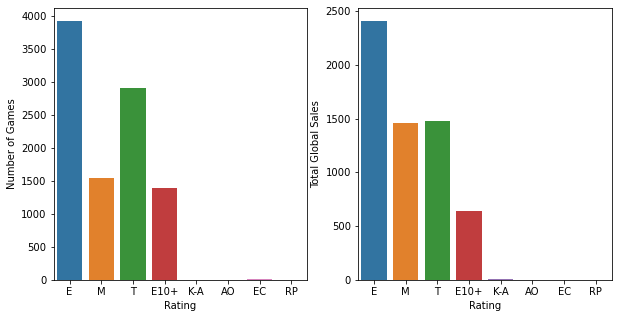

In [19]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x="Rating", data=video_games, ax=ax1)
ax1.set_ylabel("Number of Games")
sns.barplot(x="Rating", y="Global_Sales",data=video_games, estimator=sum, ax=ax2, ci=None)
ax2.set_ylabel("Total Global Sales")

Practicamente todos los Ratings son una opción entre: E (Everyone), T (Teens), M (Mature), E10+ (Everyone older than 10)

### Ventas por Score

In [20]:
type(video_games['Critic_Score'])

pandas.core.series.Series

In [21]:
video_games.dropna(subset=["Name","Critic_Score"],inplace=True)
video_games['Critic_Score'].unique()
video_games.Critic_Score = video_games.Critic_Score.astype(np.int64)
type(video_games['Critic_Score'])

pandas.core.series.Series

In [23]:
type(video_games['User_Score'])

pandas.core.series.Series

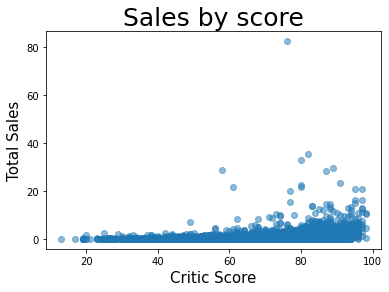

In [25]:
plt.scatter(video_games['Critic_Score'], video_games['Global_Sales'], alpha=0.5)
plt.title('Sales by score', size = 25)
plt.xlabel('Critic Score', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

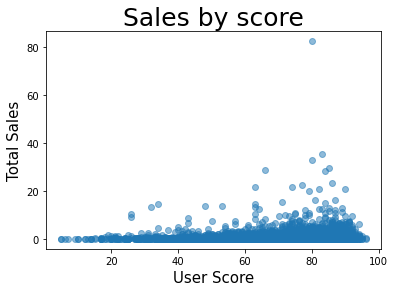

In [26]:
plt.scatter(video_games['User_Score'], video_games['Global_Sales'], alpha=0.5)
plt.title('Sales by score', size = 25)
plt.xlabel('User Score', size = 15)
plt.ylabel('Total Sales',size = 15)
plt.show()

Veamos qué juego tiene ventas tan altas

In [27]:
video_games[video_games['Global_Sales']>80]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Grouped_Platform
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51.0,80.0,322.0,Nintendo,E,Nintendo


El mismísimo Wii Sports. Esto explica cómo sobrevivió Nintendo el periodo entre el lanzamiento de Wii y de Nintendo Switch

Realicemos una agrupación de las ventas para tener una mejor claridad de la relación entre Sales, Critic Score y User Score

In [28]:
video_games['Sale_Size'] = video_games['Global_Sales'].apply(lambda x: 'Huge' if x >= 20 else
                                                                       'Big' if x >= 10 else
                                                             'Medium' if x >= 5 else
                                                             'Small' if x >= 1 else
                                                             'XSmall' if x >= 0.5 else 'XXSmall')
video_games = video_games[video_games['Global_Sales']< 80]
video_games = video_games[video_games['Year_of_Release']< 2017]

Text(0.5, 0, '')

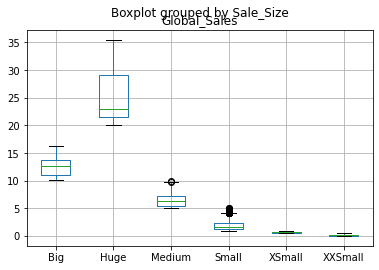

In [29]:
video_games.boxplot(column = ['Global_Sales'], by = 'Sale_Size')
plt.xlabel("")

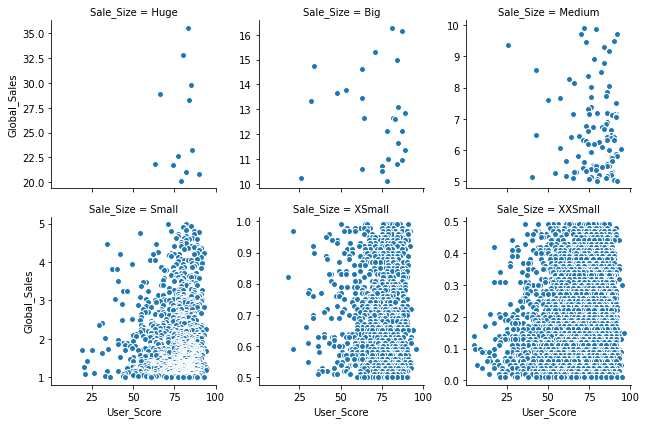

In [30]:
g = sns.FacetGrid(video_games, col="Sale_Size", col_wrap = 3, sharey = False)
g = g.map(plt.scatter, 'User_Score', 'Global_Sales', edgecolor="w")

Hay demasiados puntos como para buscar un patrón, por lo que resumiremos las ventas a nivel 'Publisher', usando el promedio y un subconjunto de años.

## Modelación

Basado en resultados anteriores, observamos que el número de juegos totales empieza a decrecer agresivamente después de 2015, lo que sugiere que los datos pueden no estar completos después de este año. Tomaremos entonces, 2015 como el límite superior para el año de estreno.

En cuanto al limite inferior, 2001 será tomado ya que es el año en el que comienza a aparecer la consola "XBox" de Microsoft, una de las consolas más importantes de la actualidad. Antes de esto, el mercado de videojuegos se veía muy distinto, con marcas como Sega teniendo una gran importancia que ahora han desaparecido.

Así pues, teniendo estos parámetros establecidos, se procede a buscar si existe una relación entre el Score, tanto de críticos como de usuarios y las ventas globales.

Como se observó anteriormente, tomar los datos desagregados no parece muy prometedor, por lo que se tomará un promedio tanto de ventas globales como de Scores de críticos y usuarios a nivel 'Publisher', esto creará una reducción en el número de datos, mientras que se captura y condensa el comportamiento que vamos a analizar.

In [40]:
scores_data = video_games[video_games['Year_of_Release'].between(2001,2015)]
scores_data = scores_data[['Global_Sales', 'Publisher', 'User_Score', 'Critic_Score']].dropna()
scores_by_publisher = scores_data.groupby(['Publisher']).mean()

In [50]:
scores_by_publisher

,Global_Sales,User_Score,Critic_Score
Publisher,,,
10TACLE Studios,0.020000,70.000000,42.000000
1C Company,0.033333,77.333333,73.000000
2D Boy,0.040000,85.000000,90.000000
3DO,0.145455,60.636364,55.272727
505 Games,0.417162,64.351351,62.175676
...,...,...,...
Zoo Digital Publishing,0.194167,64.875000,52.916667
Zoo Games,0.446667,72.666667,60.333333
Zushi Games,0.210000,86.000000,68.000000


Obsérvese que se toman únicamente los casos completos, es decir, casos que no tienen datos faltantes en ninguna de las variables de interés.

In [42]:
scores_by_publisher.corr()

,Global_Sales,User_Score,Critic_Score
Global_Sales,1.000000,0.090667,0.230041
User_Score,0.090667,1.000000,0.689923
Critic_Score,0.230041,0.689923,1.000000


La matriz de correlación sugiere que la relación entre 'User Score' y 'Global Sales' es débil, mientras que la relación entre 'Global Sales' y 'Critic Score' es un poco más fuerte.

Como es de esperarse, ambos 'Scores' están correlacionados, ya que, en general, las reseñas de los críticos suele coincidir con la percepción general del público, aunque, por supuesto, existen excepciones.

### Ajustar modelos

Para obtener información más clara sobre la relación entre estas variables, es conveniente ajustar un modelo de regresión lineal.

Se utilizará para este propósito, la función LinearRegression() del paquete scikit-learn, y matplotlib para visualizar los resultados.

In [85]:
u_sc = scores_by_publisher['User_Score'].values.reshape(-1, 1)  # convertir cada columna a un numpy array
c_sc = scores_by_publisher['Critic_Score'].values.reshape(-1, 1)
g_sl = scores_by_publisher['Global_Sales'].values.reshape(-1, 1)

lm_1 = LinearRegression()  # crear objetos de la clase "LinearRegression"
lm_2 = LinearRegression()  # un objeto por cada modelo que se quiere ajustar
lm_3 = LinearRegression()

lm_1.fit(u_sc, g_sl)  # Ajuste de los modelos por medio de regresión Lineal
lm_2.fit(c_sc, g_sl) 
lm_3.fit(c_sc,u_sc) 

g_sl_1_pred = lm_1.predict(u_sc)  # Predicciones para cada modelo
g_sl_2_pred = lm_2.predict(c_sc)
u_sc_pred = lm_3.predict(c_sc)

#### Ventas globales vs. Score de usuario

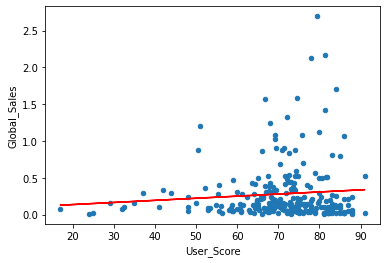

In [62]:
scores_by_publisher.plot.scatter('User_Score','Global_Sales')
plt.plot(u_sc, g_sl_1_pred, color = "red")

En primer lugar, visualizamos la relación entre ventas globales y score de usuario. Como observamos en la matriz de correlación anterior, la correlación entre estas dos variables no es muy fuerte. Esto se debe a que existen Publishers que suelen tener altos scores de usuario pero que no tienen un volumen de venta tan grande.

In [78]:
print('Beta_0:',lm_1.intercept_)
print('Beta_1:',lm_1.coef_)
print('R^2:',lm_1.score(u_sc, g_sl))

Beta_1: [[0.00284772]]
Beta_0: [0.08134856]
R^2: 0.008220542421938037


El coeficiente $R^2$ tan bajo nos indica que la variabilidad en las ventas no puede explicarse por medio del score de usuario.

#### Ventas globales vs. Score de críticos

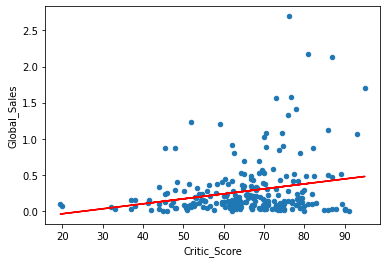

In [63]:
scores_by_publisher.plot.scatter('Critic_Score','Global_Sales')
plt.plot(c_sc, g_sl_2_pred, color = "red")

Se observa un caso similar al anterior, aunque parece haber una relación positiva fuerte, existen muchos 'Publishers' con muy buenos scores que no se traducen en niveles altos de venta.

In [79]:
print('Beta_0:',lm_2.intercept_)
print('Beta_1:',lm_2.coef_)
print('R^2:',lm_2.score(c_sc, g_sl))

Beta_0: [-0.16939005]
Beta_1: [[0.00686271]]
R^2: 0.05291874593426005


El coeficiente $R^2$ tan bajo, aunque un poco más alto que en el modelo de usuario, nos indica que la variabilidad en las ventas no puede explicarse por medio del score de críticos.

#### Score de críticos vs. Score de usuarios  

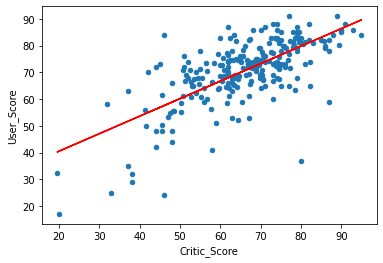

In [84]:
scores_by_publisher.plot.scatter('Critic_Score','User_Score')
plt.plot(c_sc, u_sc_pred, color = "red")

Ambos scores muestran una clara relación líneal positiva, mostrando que en general van de la mano 

In [82]:
print('Beta_0:',lm_3.intercept_)
print('Beta_1:',lm_3.coef_)
print('R^2:',lm_3.score(u_sc,c_sc))

Beta_0: [14.5658623]
Beta_1: [[0.72636828]]
R^2: 0.4759943151326008


Un coeficiente $R²$ $\approx.5$ sugiere que en general el score de crítico puede ser un buen predictor para el score de usuario, lo cual es importante ya que, en general, los scores de crítico son conocidos antes que los scores de usuario, y muchos usuarios pueden tomar la decisión de comprar o no un juego basado en las reseñas publicadas por los críticos.

Es importante notar que, aunque en general el ajuste es decente, existen muchos casos en los que el score de críticos es alto y el score de usuarios resultó ser bastante bajo.